# What is a Pivot Table in Pandas?

A pivot table in Pandas is a powerful tool used to summarize, aggregate, and restructure data. It allows you to group and organize data based on one or more keys (like rows and columns), and then apply an aggregation function (like sum(), mean(), or count()).


# Why Do We Use Pivot Tables?

Summarize data in a readable and compact form.

Group data by categories or values.

Perform aggregations (like total, average, count).

Restructure data to better understand patterns or comparisons.




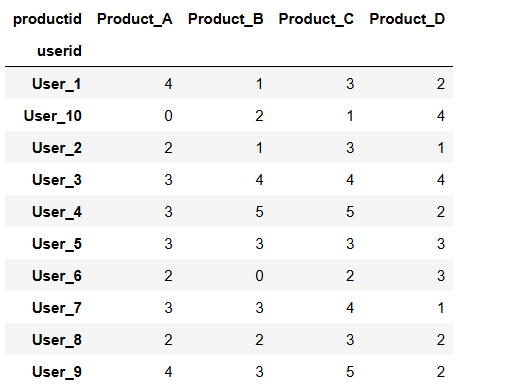

# Dummy Data (Optional)

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

# Generate random data
num_rows = 100
names = np.random.choice(range(1, 11), num_rows)
ratings = np.random.choice(range(1, 6), num_rows)
user_names = [f'User_{name}' for name in names]
product_names = [f'Product_{np.random.choice(["A", "B", "C", "D"])}' for _ in range(num_rows)]

# Sample reviews
sample_reviews = [
    "Excellent quality!",
    "Not what I expected.",
    "Would buy again.",
    "Terrible experience.",
    "Pretty decent overall.",
    "Highly recommend!",
    "Just okay.",
    "Very satisfied.",
    "Could be better.",
    "Loved it!"
]
reviews = [random.choice(sample_reviews) for _ in range(num_rows)]

# Random timestamps within the last year
def random_date(start, end):
    return start + timedelta(seconds=random.randint(0, int((end - start).total_seconds())))

start_date = datetime.now() - timedelta(days=365)
end_date = datetime.now()
timestamps = [random_date(start_date, end_date) for _ in range(num_rows)]

# Create DataFrame
data = pd.DataFrame({
    'userid': user_names,
    'productid': product_names,
    'Rating': ratings,
    'Review': reviews,
    'Timestamp': timestamps
})

# Preview
data

,userid,productid,Rating,Review,Timestamp
0,User_7,Product_C,4,Not what I expected.,2024-09-12 09:33:45.782623
1,User_4,Product_D,2,Excellent quality!,2025-03-24 22:37:42.782623
2,User_8,Product_D,1,Pretty decent overall.,2025-01-12 15:09:28.782623
3,User_5,Product_A,5,Terrible experience.,2025-01-03 22:27:36.782623
4,User_7,Product_A,3,Terrible experience.,2024-09-18 15:45:25.782623
...,...,...,...,...,...
95,User_10,Product_B,1,Just okay.,2024-07-01 02:43:46.782623
96,User_9,Product_C,5,Very satisfied.,2024-09-10 03:54:49.782623
97,User_7,Product_D,4,Would buy again.,2025-05-15 14:28:13.782623
98,User_9,Product_A,2,Pretty decent overall.,2025-01-14 22:58:39.782623


# Create User Item Matrix

In [16]:
user_item_matrix = data.pivot_table(index='userid',columns='productid',values='Rating', fill_value=0).astype(int)

In [17]:
user_item_matrix

productid,Product_A,Product_B,Product_C,Product_D
userid,,,,
User_1,4,1,3,2
User_10,0,2,1,4
User_2,2,1,3,1
User_3,3,4,4,4
User_4,3,5,5,2
User_5,3,3,3,3
User_6,2,0,2,3
User_7,3,3,4,1
User_8,2,2,3,2
